In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# CSV 파일 읽어서 데이터프레임으로 변환
df = pd.read_csv(filename, encoding='cp949')

Saving 국가보훈부_독립유공자 명단_20241219.csv to 국가보훈부_독립유공자 명단_20241219 (7).csv


# 결측치 분석
- 운동 계열별 결측치 (ex. 사망년도)
- 결측치가 있는 행 분석 (ex. 다른 많은 자료도 결측치로 표현되는지 / 해당 열만 결측치인지)

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def validate_date_format(date):
    try:
        # 날짜 형식이 유효한지 확인
        pd.to_datetime(date, format='%Y-%m-%d', errors='raise')
        return date
    except ValueError:
        return np.nan

In [ ]:
# 각 열에 대해 변환 적용
df['생년월일'] = df['생년월일'].apply(validate_date_format)
df['사망년월일'] = df['사망년월일'].apply(validate_date_format)

## 운동계열 별 사망년도 결측치 수 분석

In [ ]:
date = df['사망년월일'].isna().groupby(df['운동계열']).sum()
date

,사망년월일
운동계열,
3.1운동,1964
계몽운동,28
광복군,69
구주방면,0
국내항일,740
노령방면,82
독립운동지원,16
만주방면,1167
문화운동,6


In [ ]:
date_sorted = date.sort_values(ascending=False) # 정렬
date_sorted

,사망년월일
운동계열,
3.1운동,1964
만주방면,1167
의병,1079
국내항일,740
학생운동,242
미주방면,189
임시정부,98
중국방면,84
노령방면,82


<ipython-input-19-77ad3e944f1c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=date.index, y=date_sorted.values, palette="viridis")


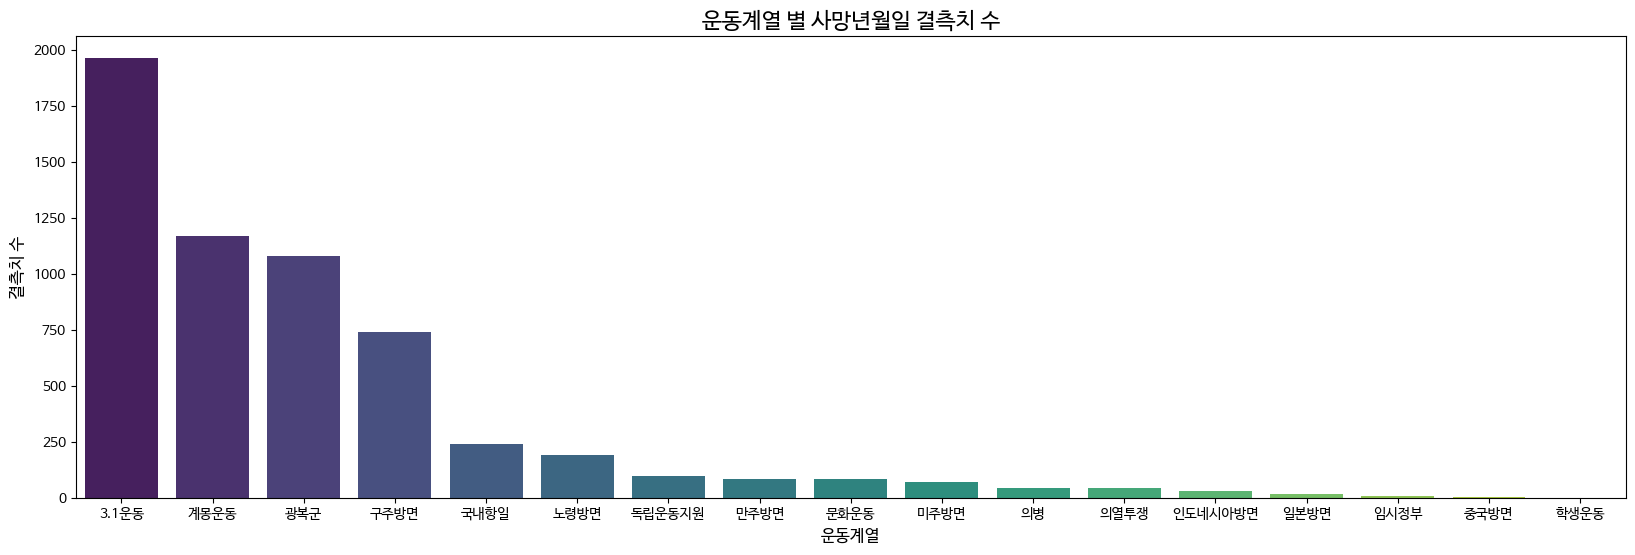

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(x=date.index, y=date_sorted.values, palette="viridis")
plt.title("운동계열 별 사망년월일 결측치 수", fontsize=16)
plt.xlabel("운동계열", fontsize=12)
plt.ylabel("결측치 수", fontsize=12)
plt.show()

## 각 행별로 결측치 분석

In [ ]:
df.columns

Index(['관리번호', '성명', '생년월일', '사망년월일', '성별', '본적(대)', '본적(중)', '운동계열', '포상년도',
       '훈격(대분류)', '훈격(소분류)', '훈장전수여부', '외국인여부'],
      dtype='object')

In [ ]:
df['본적(대)'].isna().sum()

0

In [ ]:
df['본적(중)'].isna().sum()

2023

In [ ]:
df['운동계열'].isna().sum()

0

In [ ]:
df['생년월일'].isna().sum()

5764

In [ ]:
df['사망년월일'].isna().sum()

5856

In [ ]:
df['성별'].isna().sum()

0

In [ ]:
df['포상년도'].isna().sum()

0

In [ ]:
df['훈격(대분류)'].isna().sum()

0

In [ ]:
df['훈격(소분류)'].isna().sum()

0

In [ ]:
df['훈장전수여부'].isna().sum()

0

In [ ]:
df['외국인여부'].isna().sum()

0

## 생년월일이 결측치인 것과 사망년월일인 결측치인 것의 관계

In [ ]:
# 두 열의 결측치 여부 확인
df['생년월일_결측'] = df['생년월일'].isna()
df['사망년월일_결측'] = df['사망년월일'].isna()

# 두 열의 결측치 관계 비교
relation_counts = df.groupby(['생년월일_결측', '사망년월일_결측']).size()

# 결과 출력
relation_counts

생년월일_결측  사망년월일_결측
False    False       10072
         True         2326
True     False        2234
         True         3530
dtype: int64

Text(0.5, 1.0, '생년월일 결측 여부와 사망년월일 결측 여부 관계')

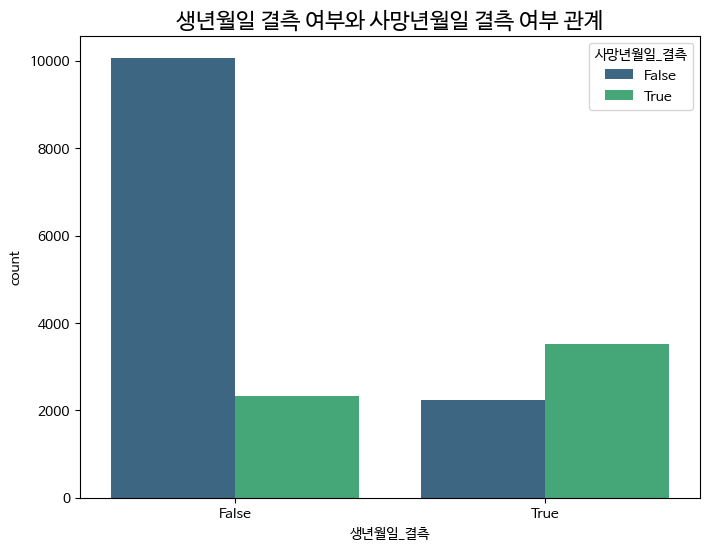

In [ ]:
plt.figure(figsize=(8, 6))
# Reset index to convert the Series to a DataFrame
relation_counts = relation_counts.reset_index(name='count')
sns.barplot(
    data=relation_counts,
    x='생년월일_결측',
    y='count',
    hue='사망년월일_결측',
    palette='viridis'
)
plt.title("생년월일 결측 여부와 사망년월일 결측 여부 관계", fontsize=16)